In [4]:
#Importing the required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
import joblib
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [5]:
#load the Data Set

df=pd.read_csv("temperature_forecast.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [6]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [7]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [8]:
df.sample(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
3727,3.0,25-07-2015,25.9,23.4,64.920578,90.048904,29.224491,24.713424,6.364944,10.550587,...,0.700422,0.000000,0.0,37.5776,127.058,33.3068,0.2661,5553.048828,30.3,23.2
1747,23.0,07-07-2014,32.7,22.4,60.080421,89.988228,28.598793,23.499987,5.839855,74.466789,...,0.082956,0.007398,0.0,37.5372,126.891,15.5876,0.1554,5801.465820,30.3,24.0
1477,3.0,28-08-2013,30.3,23.0,63.538727,88.232056,28.570824,24.758663,10.101982,37.088491,...,0.065248,3.241645,0.0,37.5776,127.058,33.3068,0.2661,4537.609863,27.0,23.3
4567,18.0,27-08-2015,30.2,22.5,37.029846,85.229088,29.007492,19.671936,5.282749,77.458052,...,0.000000,0.000000,0.0,37.4832,127.024,56.4448,1.2313,4554.502441,29.5,19.5
1234,10.0,18-08-2013,30.5,26.6,48.050301,96.795891,31.244556,24.137278,6.975876,85.493624,...,0.000000,0.000000,0.0,37.4562,126.955,208.5070,5.1782,4843.271973,32.1,22.2


# EDA (Exploratory Data Analysis)

In [9]:
df.shape #Checking the Rows and Columns of Dataset

(7752, 25)

There are 7752 Rows and 25 Columns are present in Dataset

In [10]:
#Checking the Null Values

df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<Axes: >

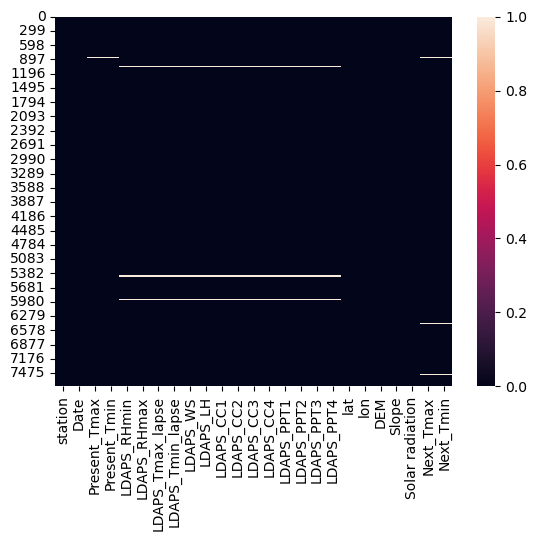

In [11]:
#Lets see the Null values on Heatmap

sns.heatmap(df.isnull())

There are Null values in the many columns of dataset and in heatmap also we can see some datas are missing

"Station" and "Date" columns have a small number of missing values (2 each), possibly due to data collection or recording errors. Investigating and addressing these missing values is reasonable.

Several weather-related attributes, including "Present_Tmax," "Present_Tmin," "LDAPS_RHmin," and "LDAPS_RHmax," exhibit missing values. These gaps may stem from sensor issues or data recording gaps, necessitating careful handling to prevent analysis bias.

The target variables "Next_Tmax" and "Next_Tmin" also contain missing values, impacting predictive modeling tasks. Depending on the extent of missing data, consider strategies like imputation or excluding affected rows.

In conclusion, the dataset contains missing data in various columns, demanding thoughtful handling to maintain analysis and model quality. Apply strategies for imputation and missing value treatment judiciously, considering the broader context.

In [12]:
#Checking the Duplicates in Dataset

df.duplicated().sum()

0

There are zero Duplicates in Dataset

In [13]:
#Checking the Column name

df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [14]:
#Lets Drop the Null Values in Data set

df.dropna(inplace=True)

In [15]:
#checking null values after dropping
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

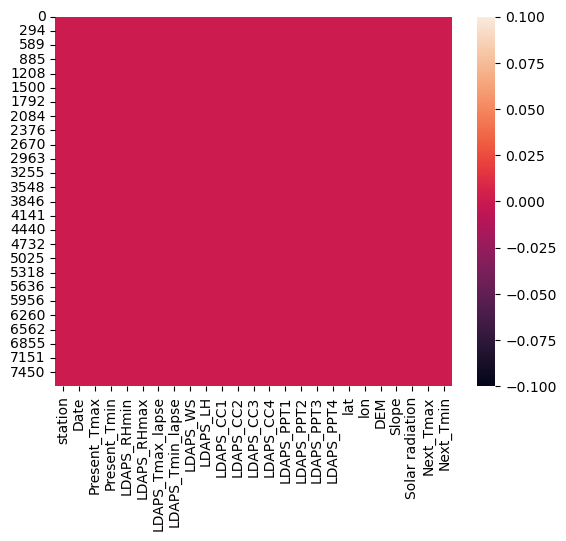

In [16]:
# Heatmap of null values
sns.heatmap(df.isnull())

Now there is no null value in the Data

In [17]:
#checking shape after removing null values
df.shape

(7588, 25)

There 7588 Rows and 25 Column are present after removing the Null values

In [18]:
#Checking informatrion about Dataste

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


there are two types of Data are present in Dataset and no Null values are found

In [19]:
#Stastical Analysis on Dataset

df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


OBSERVATION:

The dataset consists of 7,588 data points collected from 25 different weather stations.

Temperature observations indicate that the present maximum temperature (Present_Tmax) averages around 29.75°C with a standard deviation of 2.97°C.

Present minimum temperature (Present_Tmin) has an average of approximately 23.20°C and a standard deviation of about 2.40°C.

The temperature ranges widely, with Present_Tmax varying from 20.0°C to 37.6°C and Present_Tmin from 11.3°C to 29.9°C.

Relative humidity values, measured as LDAPS_RHmin and LDAPS_RHmax, display means of around 56.72% and 88.36%, respectively.

Temperature lapse values (LDAPS_Tmax_lapse and LDAPS_Tmin_lapse) have means of about 29.62°C and 23.51°C, with standard deviations of 2.94°C and 2.34°C.

Wind speed (LDAPS_WS) averages approximately 7.09 km/h with a standard deviation of 2.18 km/h.

The dataset includes latent heat flux (LDAPS_LH), cloud cover (LDAPS_CC1), and solar radiation data, each with its own respective means and standard deviations.

The geographical range covered by the dataset includes latitude and longitude values, digital elevation model (DEM), and terrain slope.

The target variables, representing next day's temperatures (Next_Tmax and Next_Tmin), exhibit means of around 30.24°C and 22.91°C, with standard deviations of approximately 3.11°C and 2.48°C, and a wide range of temperature values.

These key points provide a concise overview of the essential characteristics and statistics of the dataset, facilitating further analysis and interpretation.

In [20]:
# checking number of unique values in each column
df.nunique()

station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

Observation:
    
Station and Date: The "station" column consists of 25 unique values, indicating data from 25 distinct weather stations. The "Date" column has 307 unique values, suggesting observations spanning 307 distinct dates.

Temperature Range: Columns like "Present_Tmax" and "Present_Tmin" show relatively fewer unique values (167 and 155, respectively), suggesting a range of observed temperatures within these columns.

Continuous Data: Columns such as "LDAPS_RHmin," "LDAPS_RHmax," "LDAPS_CC1," "LDAPS_CC2," "LDAPS_CC3," and "LDAPS_CC4" exhibit a high number of unique values, nearly equal to the dataset's total rows. This indicates continuous data with minimal repetition.

Precipitation Levels: Columns like "LDAPS_PPT1," "LDAPS_PPT2," "LDAPS_PPT3," and "LDAPS_PPT4," likely representing precipitation data, have varying unique values, indicating a range of observed precipitation levels.

Geographic Data: Columns "lat," "lon," "DEM," "Slope," and "Solar radiation" consistently have a specific number of unique values (12, 25, 25, 25, and 1575, respectively). This suggests measurements across different geographic points or features

In [21]:
#checking skewness

skewness = df.skew()
skewness

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

Observation:

Features with skewness values close to 0 (around -0.5 to 0.5) are relatively balanced, indicating symmetrical data around the mean. Notable examples include "station," "Present_Tmax," "Present_Tmin," "LDAPS_Tmax_lapse," "lon," "lat," and "Solar radiation." Right-Skewed Distributions (Positive Skewness > 0.5): 2. Features with positive skewness values (greater than 0.5) exhibit right-skewed distributions. These distributions are concentrated on the left side with the tail extending to the right. Examples include "LDAPS_WS," "LDAPS_LH," "LDAPS_CC1," "LDAPS_CC2," "LDAPS_CC3," "LDAPS_CC4," "LDAPS_PPT1," "LDAPS_PPT2," "LDAPS_PPT3," "LDAPS_PPT4," "DEM," and "Slope."

Left-Skewed Distributions (Negative Skewness < -0.5): 3. Features with negative skewness values (less than -0.5) display left-skewed distributions. These distributions are concentrated on the right side with tails extending to the left. Notable examples include "LDAPS_RHmin," "LDAPS_RHmax," "LDAPS_Tmin_lapse," "Next_Tmax," and "Next_Tmin."

High Positive Skewness (Positive Skewness > 5): 4. Some features, such as "LDAPS_PPT1," "LDAPS_PPT2," "LDAPS_PPT3," and "LDAPS_PPT4," have relatively high positive skewness values (greater than 5). This suggests a heavily right-skewed distribution, indicating the presence of a few very high values that are far from the majority of data points.

Skewness Impact on Analysis: 5. Understanding the skewness of each feature is crucial for data preprocessing and modeling. Skewed data distributions can affect the performance of algorithms and statistical analyses.

Distribution Balance and Symmetry: 6. Features like "station," "Present_Tmax," and "Present_Tmin" exhibit balanced and symmetrical distributions, making them suitable for various analytical methods.

Right-Skewed Features: 7. Features like "LDAPS_WS" and "LDAPS_CC1" are right-skewed, with most data concentrated on the lower end, indicating potential outliers on the higher end.

Left-Skewed Features: 8. Features like "Next_Tmax" have left-skewed distributions, with data concentrated toward higher values. Understanding this skewness is essential for accurate analysis.

Impact of Extreme Values: 9. Features with high positive skewness values, such as "LDAPS_PPT1," may have extreme values that need careful consideration during analysis.

Data Preprocessing Consideration: 10. Data preprocessing techniques, such as transformation or outlier handling, should be applied based on the skewness of each feature to ensure robust and accurate modeling and analysis.

In [22]:
#Changing the Date type for Further use:

df['Date'] = pd.to_datetime(df['Date'])

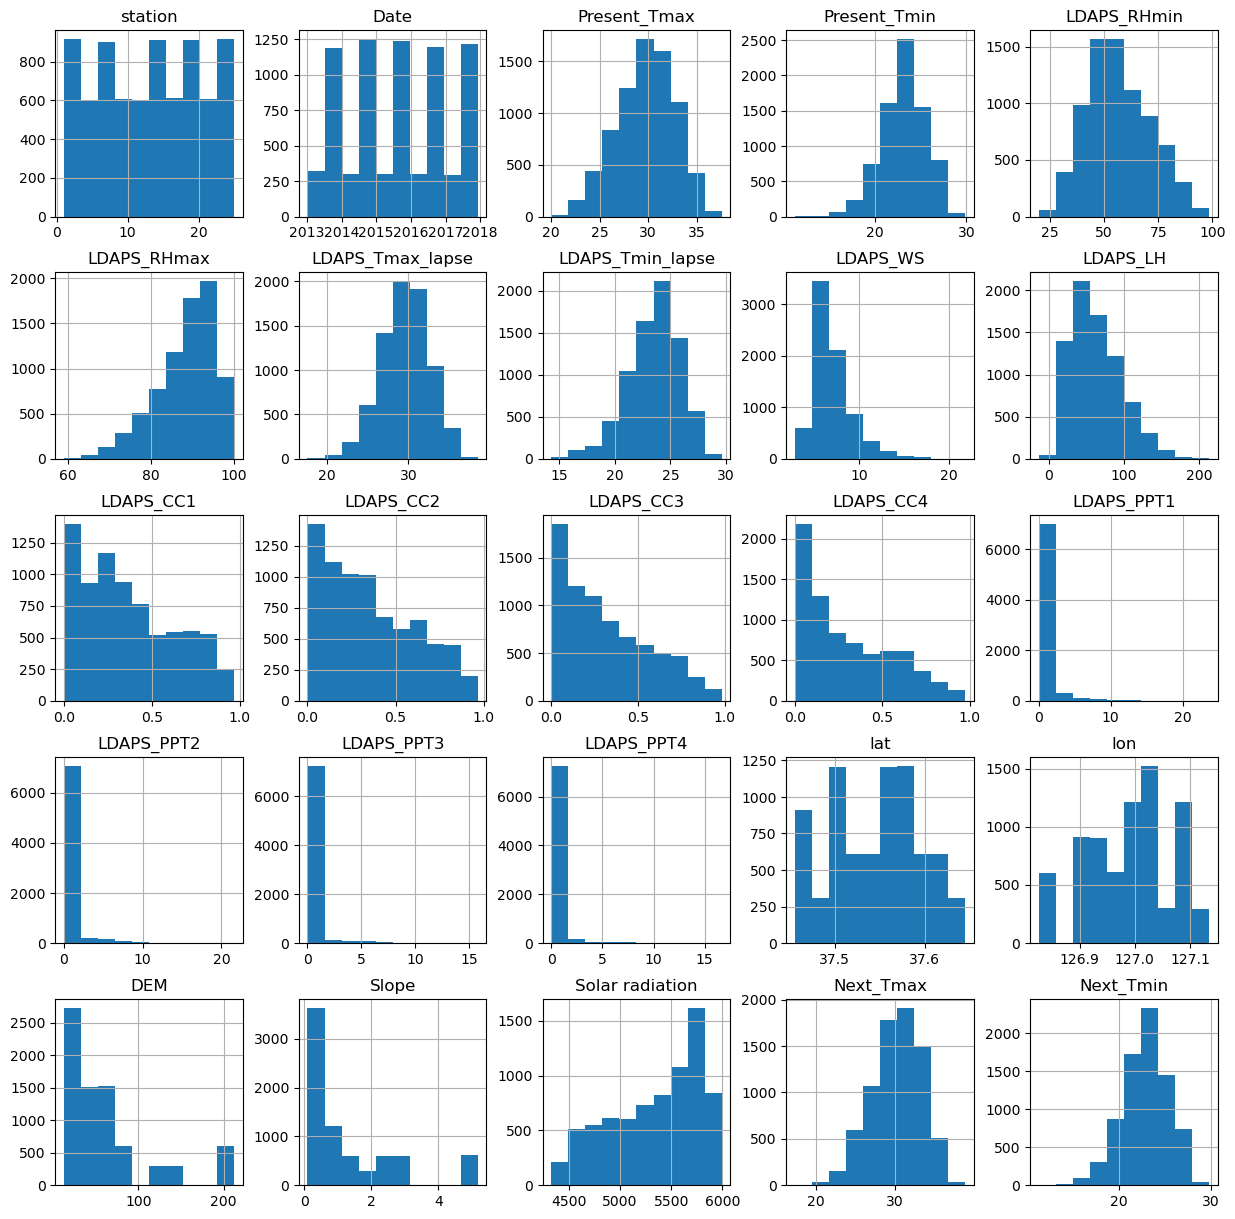

In [23]:
#Plotting histogram

df.hist(figsize=(15,15));

Observation:

Approximately 70% of the DEM values are below 50.
The majority of slope values are below 2.
Solar radiation ranges mainly from 5500 to 6000, with the highest frequency.
The highest count of present maximum temperature is around 30, while the present minimum temperature is highest at about 24.

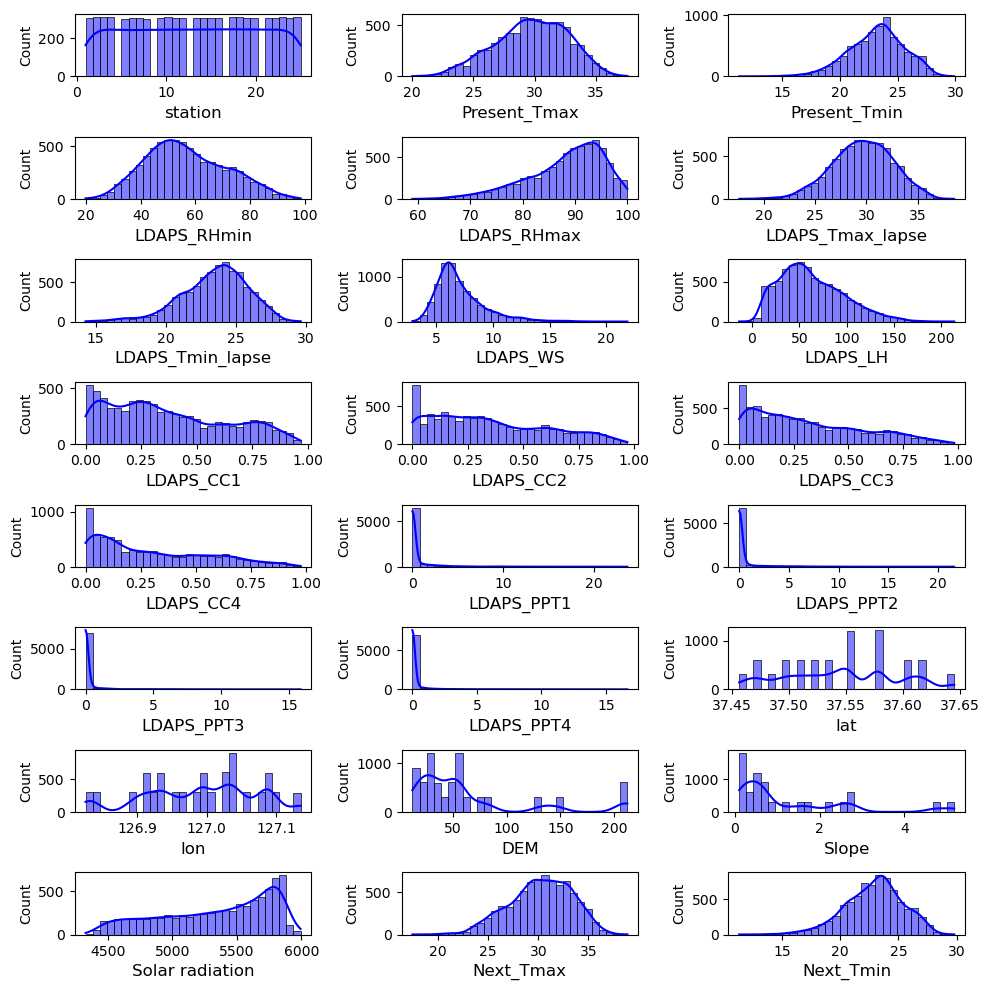

In [24]:
#Plotting KDE with refer to hist graph

plt.figure(figsize=(10, 10), facecolor='white')
plotnumber = 1

for column in df.columns:
    if column != 'Date':
        if plotnumber <= 24:
            ax = plt.subplot(8, 3, plotnumber)
            sns.histplot(df[column], bins=30, kde=True, color='blue')
            plt.xlabel(column, fontsize=12)
        plotnumber += 1

plt.tight_layout()
plt.show()

station                Axes(0.125,0.712609;0.110714x0.167391)
Present_Tmax        Axes(0.257857,0.712609;0.110714x0.167391)
Present_Tmin        Axes(0.390714,0.712609;0.110714x0.167391)
LDAPS_RHmin         Axes(0.523571,0.712609;0.110714x0.167391)
LDAPS_RHmax         Axes(0.656429,0.712609;0.110714x0.167391)
LDAPS_Tmax_lapse    Axes(0.789286,0.712609;0.110714x0.167391)
LDAPS_Tmin_lapse       Axes(0.125,0.511739;0.110714x0.167391)
LDAPS_WS            Axes(0.257857,0.511739;0.110714x0.167391)
LDAPS_LH            Axes(0.390714,0.511739;0.110714x0.167391)
LDAPS_CC1           Axes(0.523571,0.511739;0.110714x0.167391)
LDAPS_CC2           Axes(0.656429,0.511739;0.110714x0.167391)
LDAPS_CC3           Axes(0.789286,0.511739;0.110714x0.167391)
LDAPS_CC4               Axes(0.125,0.31087;0.110714x0.167391)
LDAPS_PPT1           Axes(0.257857,0.31087;0.110714x0.167391)
LDAPS_PPT2           Axes(0.390714,0.31087;0.110714x0.167391)
LDAPS_PPT3           Axes(0.523571,0.31087;0.110714x0.167391)
LDAPS_PP

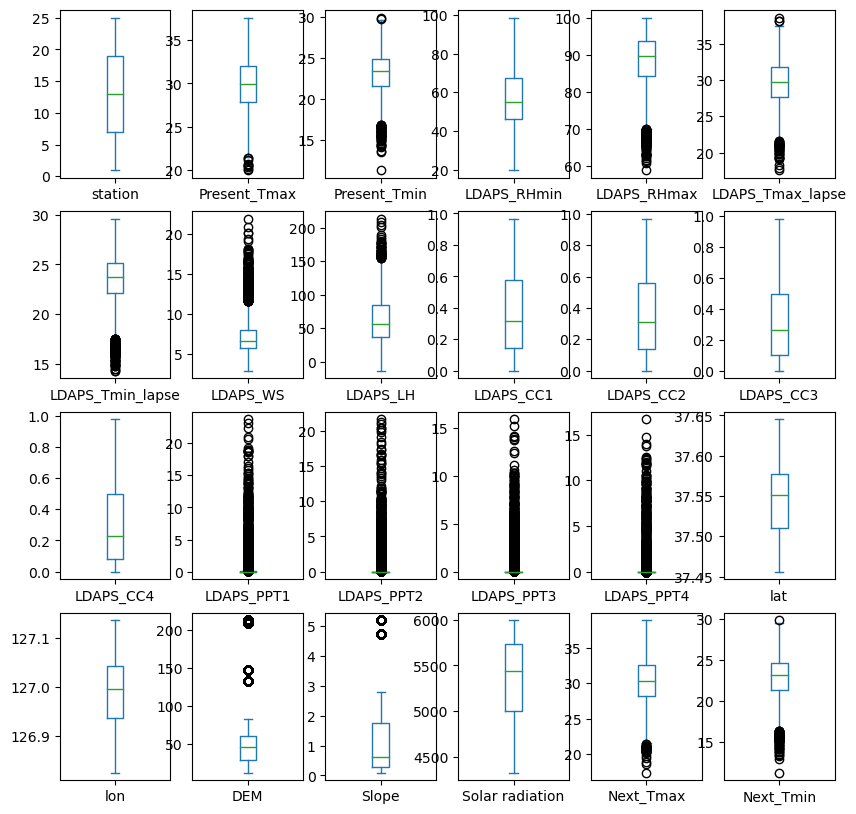

In [25]:
#Plotting Outliers with Box plot

df.plot(kind='box',subplots=True,layout=(4,6),figsize=(10,10))

Looking at this graph it is known that outliers are present in many columns . so we have to handle them for better result.

Outliers are Present in these columns: 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope','Next_Tmax', 'Next_Tmin'

In [26]:
#feature engineering

#creating day month year column by Date column
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [27]:
df.drop('Date',axis=1,inplace=True)

In [28]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


# Cleaning Data

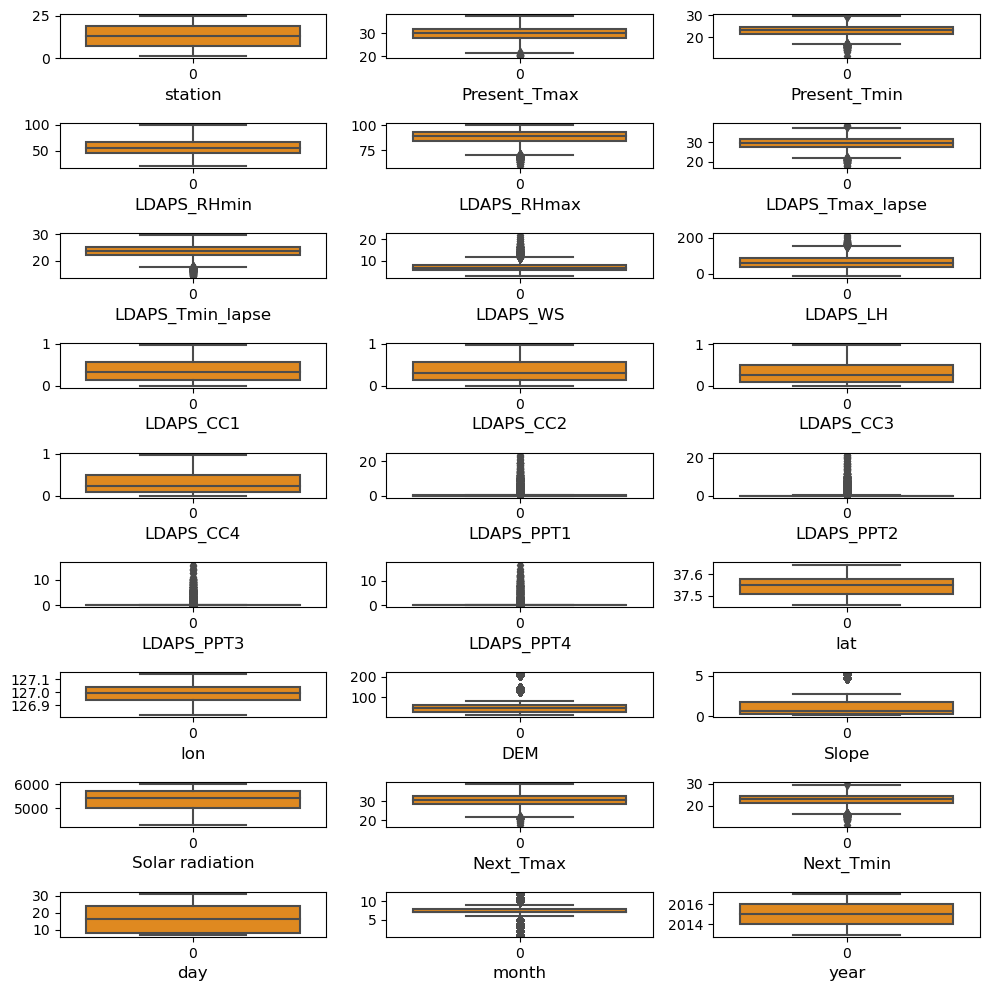

In [29]:
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df.columns:
    
    if plotnumber<=27:
        ax=plt.subplot(9,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [30]:
clolumns_to_be_handle = df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope','Next_Tmax', 'Next_Tmin']]

In [31]:
#Z score method for removing Outliers

z=np.abs(zscore(clolumns_to_be_handle))
z

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin
0,0.353318,0.748029,0.382768,0.525269,0.215525,0.126423,0.206603,0.305589,0.275777,0.239969,0.224971,2.769091,1.111162,0.366861,0.689265
1,0.725138,0.664721,0.311697,0.078334,0.223368,0.644133,0.313359,0.305589,0.275777,0.239969,0.224971,0.315828,0.543220,0.083068,0.165513
2,0.624033,0.043400,0.609425,0.160080,0.449896,0.439100,1.244497,0.305589,0.275777,0.239969,0.224971,0.526719,0.723891,0.275895,0.398527
3,0.758840,0.085054,1.128335,0.028710,0.079238,0.663353,0.096026,0.305589,0.275777,0.239969,0.224971,0.298272,0.928888,0.468721,0.559681
4,0.556630,0.539758,0.249244,0.171981,0.010803,0.624327,1.349989,0.305589,0.275777,0.239969,0.224971,0.494848,0.549485,0.308032,0.165513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,2.240616,2.247578,1.402898,0.614083,2.223667,0.225479,1.569844,0.305589,0.275777,0.239969,0.224971,0.655747,0.500966,0.848928,2.099366
7746,2.442826,2.414195,0.648815,0.990460,2.432415,0.609132,0.583486,0.305589,0.275777,0.239969,0.224971,0.735482,0.820711,0.720377,2.341098
7747,2.173212,2.539157,1.318376,1.110333,2.021883,0.434188,0.283984,0.305589,0.275777,0.239969,0.224971,0.852919,0.804538,0.623964,1.938212
7748,2.173212,2.289232,1.537141,0.886737,2.039881,0.253241,0.452772,0.305589,0.275777,0.239969,0.224971,0.821476,0.755800,0.527550,1.656192


In [32]:
# creating new dataframe

df= df[(z<3).all(axis=1)]
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30,8,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30,8,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30,8,2017


In [33]:
# checking the data loss
data_loss = (7588 -6739 )/7588 *100
data_loss

11.188719030047443

here i have also used IQR method for remove outliers but but in IQR method there is huge data loss thats why i am using Z score method for removing outliers

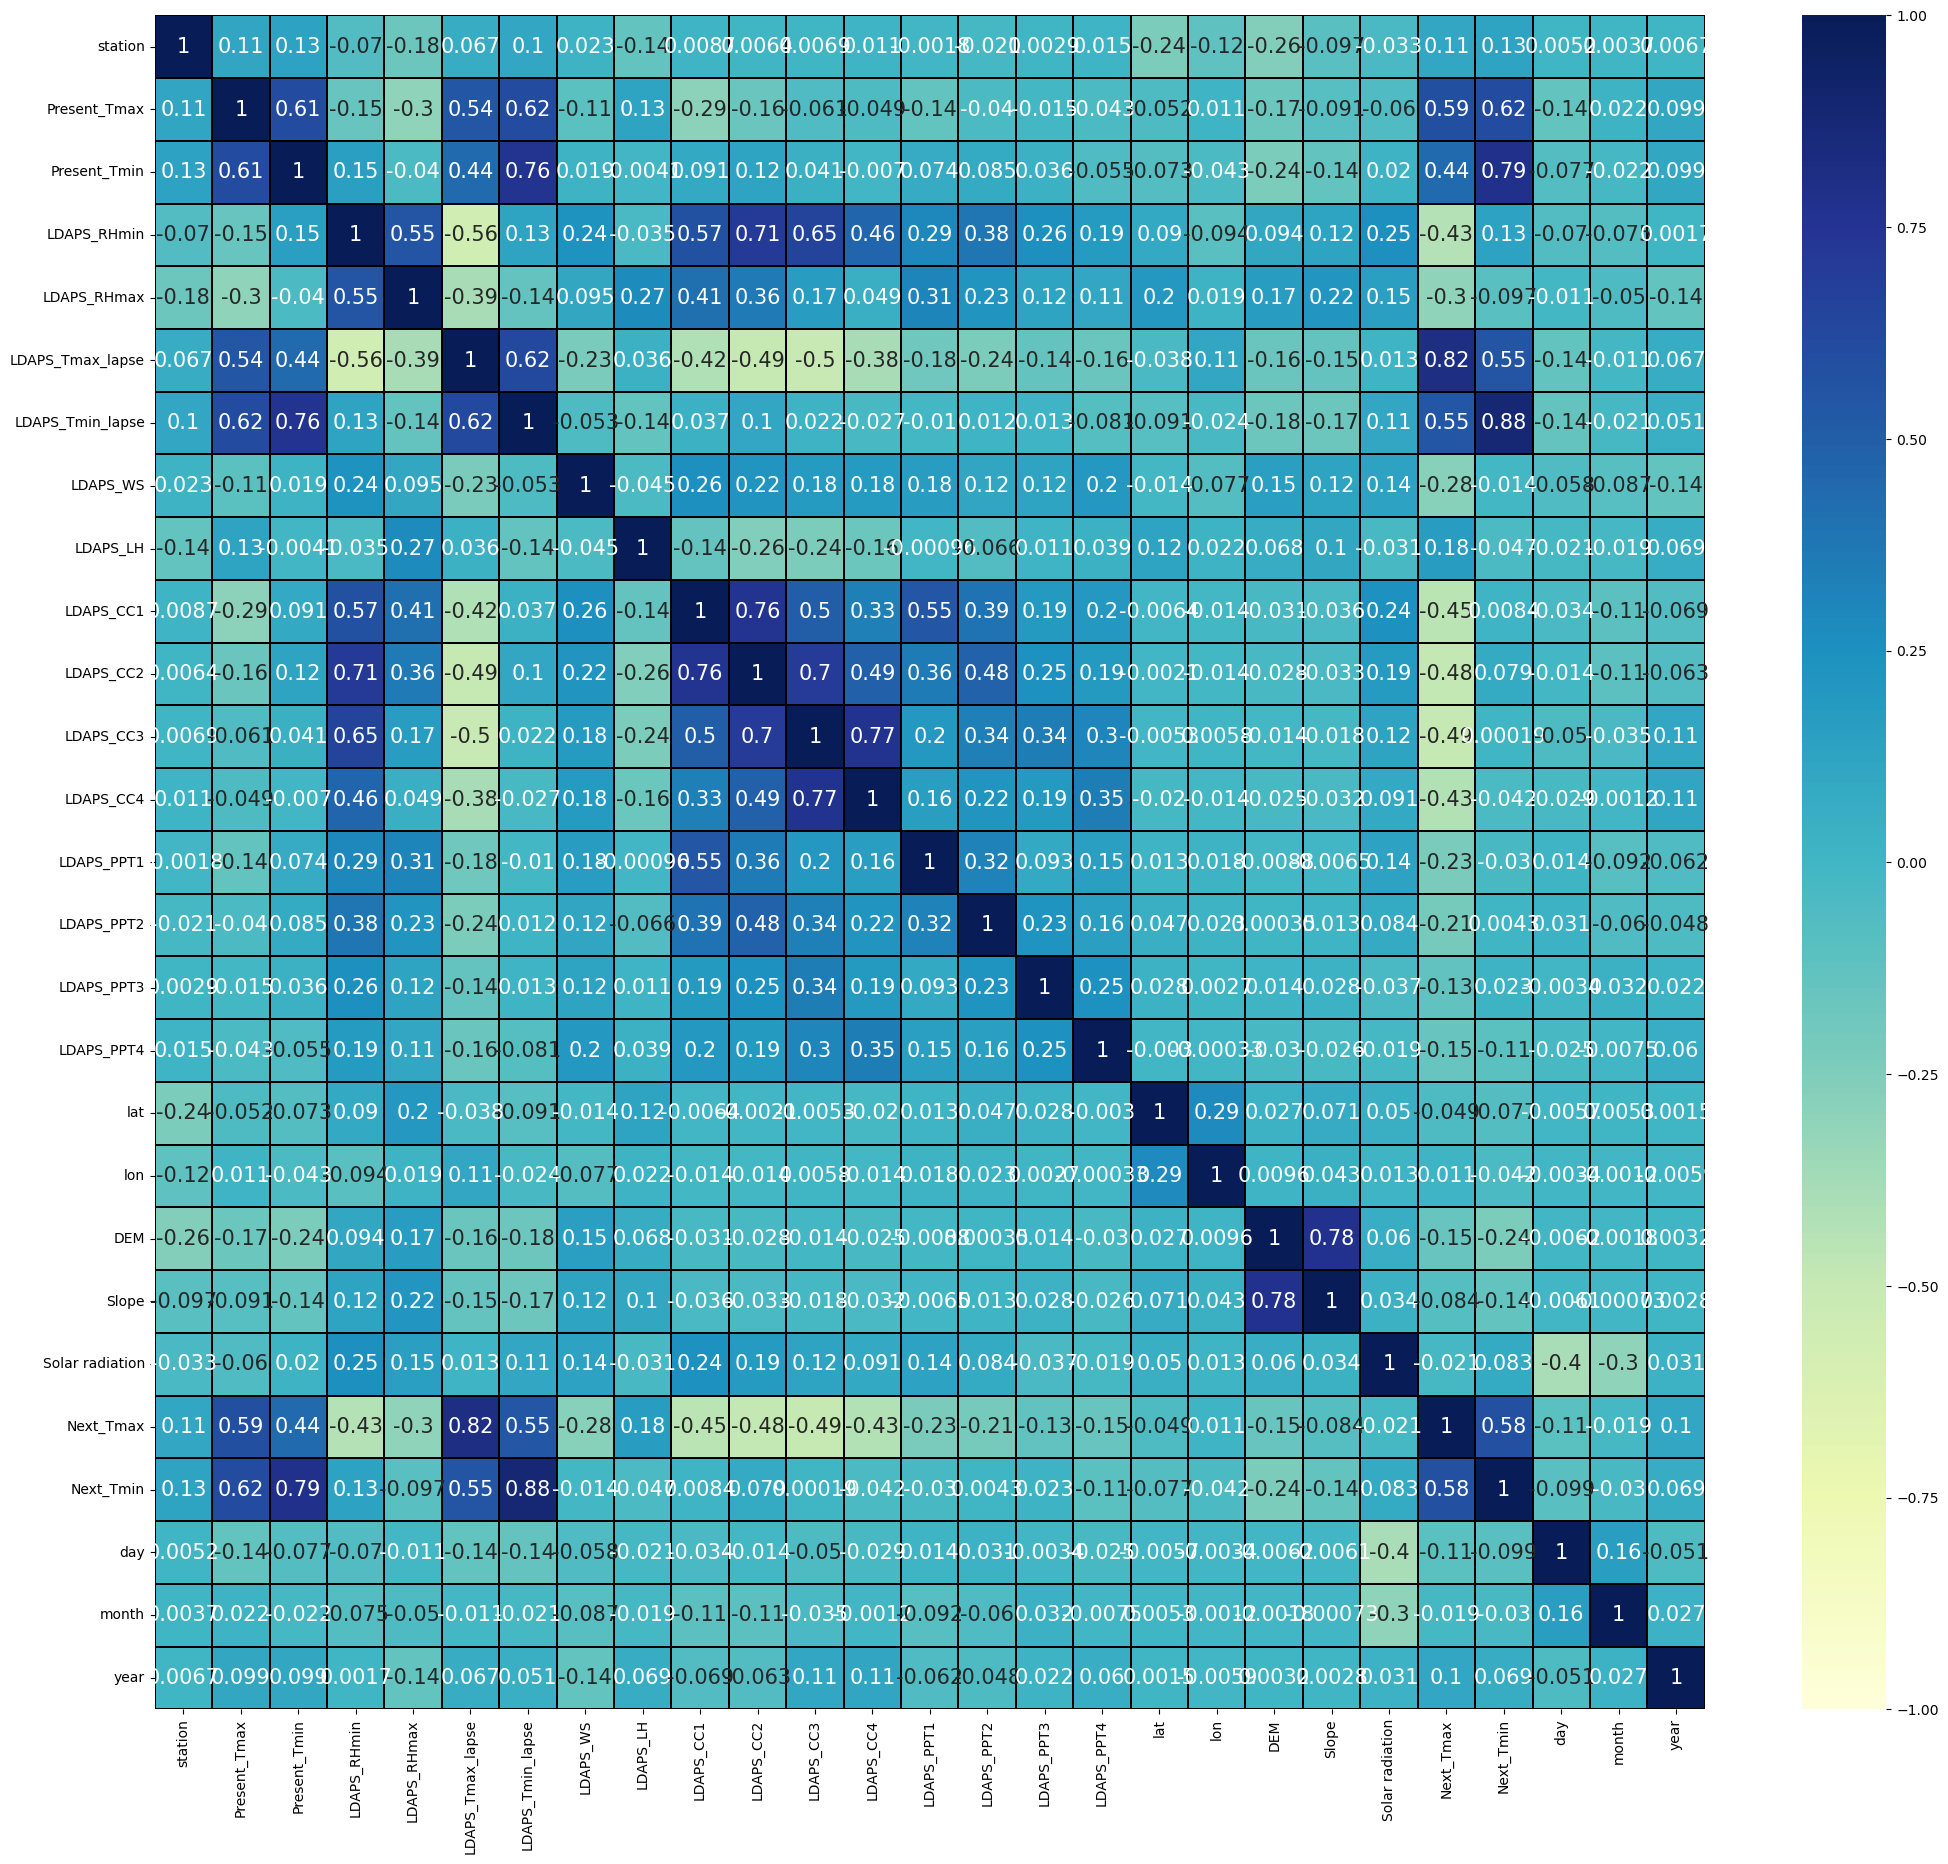

In [34]:
#Heatmap

plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

looking at the heatmap it is known that many columns are highly correlated with each other so we will handle those too.

In [35]:
#Here i am copying dataframe because i have to make 2 prediction in this project now i am praparing data according to Predicting "Next_Tmax"


df1 = df.copy()

In [36]:
#Correlation with target Column


#correlation with target column
correlation_with_quality = df.corr()['Next_Tmax'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.816861
Present_Tmax        0.586943
Next_Tmin           0.580951
LDAPS_Tmin_lapse    0.546479
LDAPS_CC3           0.492707
LDAPS_CC2           0.484796
LDAPS_CC1           0.453763
Present_Tmin        0.438813
LDAPS_RHmin         0.433872
LDAPS_CC4           0.427087
LDAPS_RHmax         0.301797
LDAPS_WS            0.277823
LDAPS_PPT1          0.233124
LDAPS_PPT2          0.211431
LDAPS_LH            0.176077
LDAPS_PPT4          0.154875
DEM                 0.151929
LDAPS_PPT3          0.131137
station             0.106378
day                 0.105005
year                0.101615
Slope               0.083907
lat                 0.048616
Solar radiation     0.021477
month               0.018696
lon                 0.010567
Name: Next_Tmax, dtype: float64


here lon month solar radiation lat is vary less correlated with target columns so we will delete them

In [37]:
# dropping irrelevant columns
df.drop(columns=['lon','month','Solar radiation','lat'],axis=1,inplace=True)

In [38]:
# Checking correlation with other features

#schecking correlation
df_corr = df.corr()
df_corr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin,day,year
station,1.000000,0.110291,0.133638,-0.069582,-0.176388,0.066863,0.104401,0.023075,-0.135023,0.008671,...,-0.001758,-0.021036,0.002851,0.015223,-0.257894,-0.096863,0.106378,0.129110,0.005179,0.006658
Present_Tmax,0.110291,1.000000,0.610428,-0.154266,-0.297804,0.540680,0.616886,-0.105162,0.130771,-0.290078,...,-0.135546,-0.040151,-0.015137,-0.042837,-0.168792,-0.091336,0.586943,0.615950,-0.136914,0.099185
Present_Tmin,0.133638,0.610428,1.000000,0.151385,-0.039688,0.441577,0.764258,0.018711,-0.004055,0.090828,...,0.073741,0.084705,0.036206,-0.055364,-0.241396,-0.138107,0.438813,0.785946,-0.076877,0.099222
LDAPS_RHmin,-0.069582,-0.154266,0.151385,1.000000,0.552581,-0.555583,0.129481,0.236324,-0.035217,0.574389,...,0.289740,0.376428,0.257765,0.185176,0.094391,0.119216,-0.433872,0.134518,-0.070194,0.001709
LDAPS_RHmax,-0.176388,-0.297804,-0.039688,0.552581,1.000000,-0.385695,-0.142575,0.094523,0.274590,0.409436,...,0.308453,0.225832,0.120010,0.106028,0.172348,0.218465,-0.301797,-0.097490,-0.011008,-0.140290
LDAPS_Tmax_lapse,0.066863,0.540680,0.441577,-0.555583,-0.385695,1.000000,0.621299,-0.229614,0.036340,-0.416255,...,-0.182235,-0.237892,-0.141172,-0.160177,-0.162061,-0.148246,0.816861,0.553227,-0.140514,0.066794
LDAPS_Tmin_lapse,0.104401,0.616886,0.764258,0.129481,-0.142575,0.621299,1.000000,-0.052648,-0.135842,0.037375,...,-0.010311,0.012282,0.012854,-0.081221,-0.177845,-0.172382,0.546479,0.875382,-0.143758,0.050935
LDAPS_WS,0.023075,-0.105162,0.018711,0.236324,0.094523,-0.229614,-0.052648,1.000000,-0.045067,0.257654,...,0.179201,0.115051,0.121172,0.196309,0.150448,0.118546,-0.277823,-0.013668,-0.057754,-0.135636
LDAPS_LH,-0.135023,0.130771,-0.004055,-0.035217,0.274590,0.036340,-0.135842,-0.045067,1.000000,-0.144578,...,-0.000963,-0.066290,0.010732,0.038641,0.068085,0.100776,0.176077,-0.046540,-0.020544,0.069044
LDAPS_CC1,0.008671,-0.290078,0.090828,0.574389,0.409436,-0.416255,0.037375,0.257654,-0.144578,1.000000,...,0.545002,0.394805,0.191398,0.196073,-0.030685,-0.036418,-0.453763,0.008400,-0.034100,-0.069276


In [39]:
#We are writing this function to see those columns which are highly correlated with each other

correlation_threshold = 0.85
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [40]:
features_to_drop

{'Next_Tmin'}

here Next_Tmin is highly correlated with other columns so I am going to delete this column

In [41]:
df.drop('Next_Tmin',axis=1, inplace=True)

In [42]:
#VIF

num = df.copy()

In [43]:
num.drop('Next_Tmax',axis=1, inplace=True)

In [44]:
num.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'day',
       'year'],
      dtype='object')

In [45]:
sc=StandardScaler()
standard=sc.fit_transform(num)

In [46]:
standard=pd.DataFrame(standard, columns=num.columns)

In [47]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [48]:
VIF

,features,vif
0,station,1.169634
1,Present_Tmax,2.742693
2,Present_Tmin,3.098832
3,LDAPS_RHmin,5.564567
4,LDAPS_RHmax,2.261848
5,LDAPS_Tmax_lapse,6.462409
6,LDAPS_Tmin_lapse,6.891897
7,LDAPS_WS,1.229828
8,LDAPS_LH,1.553421
9,LDAPS_CC1,3.484663


1.PREDICTING 'Next_Tmax'

In [49]:
#Splitting into Feature and Target column

X= df.drop('Next_Tmax', axis=1)
Y=df['Next_Tmax']

In [50]:
#removing Skewness

X.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
DEM                 1.764698
Slope               1.590130
day                 0.256528
year                0.025066
dtype: float64

In [51]:
#Transformed by Power Transformer

transformed=power_transform(X)

pd.DataFrame(transformed).skew()

0    -0.203507
1    -0.033180
2    -0.022294
3    -0.014095
4    -0.103320
5    -0.012837
6    -0.027814
7     0.007615
8    -0.030736
9     0.065308
10    0.050023
11    0.094449
12    0.142061
13    1.617538
14    1.820237
15    1.995359
16    2.267954
17    0.038830
18    0.233799
19   -0.033392
20    0.000000
dtype: float64

In [52]:
#Standardization

sc=StandardScaler()

In [53]:
X=sc.fit_transform(transformed)


Model Training
Find best Randomstate

In [54]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7879116348912419 on Random State = 84


In [55]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.20,random_state=maxRS)

Defining All Regression Models

In [56]:
# Create instances of regression models
LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
GB_model = GradientBoostingRegressor()
ADA_model = AdaBoostRegressor()
Bag_model = BaggingRegressor()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()

# Create a list of regression models
model = [LR_model, RFR_model, GB_model, ADA_model, Bag_model, DT_model, KNR_model]

In [57]:
#Model Traning

for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_train = reg_model.score(x_train, y_train)
    pred = reg_model.predict(x_test)
    r2_test = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    
    print('Model:', reg_model)
    print('R-squared (Train):', r2_train)
    print('R-squared (Test):', r2_test)
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('*' * 30)

Model: LinearRegression()
R-squared (Train): 0.7538569435013012
R-squared (Test): 0.7879116348912419
Mean Squared Error (MSE): 1.893911339881428
Mean Absolute Error (MAE): 1.0581407924707842
******************************
Model: RandomForestRegressor()
R-squared (Train): 0.9842612160663609
R-squared (Test): 0.907463010699985
Mean Squared Error (MSE): 0.8263388390207717
Mean Absolute Error (MAE): 0.6845037091988129
******************************
Model: GradientBoostingRegressor()
R-squared (Train): 0.8651722491827452
R-squared (Test): 0.8654116259693017
Mean Squared Error (MSE): 1.2018502177723502
Mean Absolute Error (MAE): 0.8416031910122731
******************************
Model: AdaBoostRegressor()
R-squared (Train): 0.7687128539057396
R-squared (Test): 0.787686000979378
Mean Squared Error (MSE): 1.895926210542163
Mean Absolute Error (MAE): 1.108842427353109
******************************
Model: BaggingRegressor()
R-squared (Train): 0.9770940716736662
R-squared (Test): 0.89527863990562

CrossValidation

In [58]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_test = r2_score(y_test, reg_model.predict(x_test))
    
    cv_r2 = cross_val_score(reg_model, X, Y, cv=5, scoring='r2').mean()
    
    print('Model:', reg_model)
    print('R-squared (Test):', r2_test)
    print(f'Cross-validation R-squared:', cv_r2)
    print('*' * 50)

Model: LinearRegression()
R-squared (Test): 0.7879116348912419
Cross-validation R-squared: 0.6549439223349393
**************************************************
Model: RandomForestRegressor()
R-squared (Test): 0.9075034029773872
Cross-validation R-squared: 0.6592799068553192
**************************************************
Model: GradientBoostingRegressor()
R-squared (Test): 0.8654309383645821
Cross-validation R-squared: 0.6853971848785612
**************************************************
Model: AdaBoostRegressor()
R-squared (Test): 0.7802390334819934
Cross-validation R-squared: 0.6582664833617689
**************************************************
Model: BaggingRegressor()
R-squared (Test): 0.8914143004303255
Cross-validation R-squared: 0.6325390263890058
**************************************************
Model: DecisionTreeRegressor()
R-squared (Test): 0.780143552594414
Cross-validation R-squared: 0.3939631100647406
**************************************************
Model: KNeighbo

Random Forest Regressor is beast model

Hyperparameter tuning on RandomForest Regressor

In [59]:
n_estimator= [50,100,200] 
max_features= ['auto','sqrt']  
max_depth=[None, 10, 20]  
min_samples_split= [2, 5, 10] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [50, 100, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 4, 7]}

In [60]:

grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [61]:
grid_search.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [62]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [63]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.9162670647315865

Afetr Hyperparameter tuning Random Forest Regressor is giving 91% Acuuracy

Saving the Model

In [64]:
joblib.dump(grid_search.best_estimator_,"temprature_next_day_max.pkl")

['temprature_next_day_max.pkl']

2.Next_Tmin PREDICTION

In [65]:
df1.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [66]:
#Checking Correlation with Target Column

#correlation with target column
correlation_with_quality = df1.corr()['Next_Tmin'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.875382
Present_Tmin        0.785946
Present_Tmax        0.615950
Next_Tmax           0.580951
LDAPS_Tmax_lapse    0.553227
DEM                 0.237683
Slope               0.136838
LDAPS_RHmin         0.134518
station             0.129110
LDAPS_PPT4          0.106821
day                 0.099202
LDAPS_RHmax         0.097490
Solar radiation     0.083207
LDAPS_CC2           0.078871
lat                 0.076705
year                0.069291
LDAPS_LH            0.046540
LDAPS_CC4           0.041994
lon                 0.041574
month               0.030289
LDAPS_PPT1          0.029752
LDAPS_PPT3          0.023274
LDAPS_WS            0.013668
LDAPS_CC1           0.008400
LDAPS_PPT2          0.004340
LDAPS_CC3           0.000194
Name: Next_Tmin, dtype: float64


In [67]:
# dropping irrelevant columns
df1.drop(columns=['LDAPS_CC3','LDAPS_PPT2','LDAPS_CC1','LDAPS_WS','LDAPS_PPT3','LDAPS_PPT1','month'],axis=1,inplace=True)

In [68]:
#schecking correlation
df1_corr = df1.corr()
df1_corr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_LH,LDAPS_CC2,LDAPS_CC4,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,year
station,1.000000,0.110291,0.133638,-0.069582,-0.176388,0.066863,0.104401,-0.135023,0.006380,0.011167,0.015223,-0.241811,-0.122829,-0.257894,-0.096863,-0.032810,0.106378,0.129110,0.005179,0.006658
Present_Tmax,0.110291,1.000000,0.610428,-0.154266,-0.297804,0.540680,0.616886,0.130771,-0.157917,-0.049339,-0.042837,-0.052041,0.011132,-0.168792,-0.091336,-0.059891,0.586943,0.615950,-0.136914,0.099185
Present_Tmin,0.133638,0.610428,1.000000,0.151385,-0.039688,0.441577,0.764258,-0.004055,0.117894,-0.006979,-0.055364,-0.072707,-0.043201,-0.241396,-0.138107,0.020030,0.438813,0.785946,-0.076877,0.099222
LDAPS_RHmin,-0.069582,-0.154266,0.151385,1.000000,0.552581,-0.555583,0.129481,-0.035217,0.713238,0.458417,0.185176,0.090054,-0.093969,0.094391,0.119216,0.251733,-0.433872,0.134518,-0.070194,0.001709
LDAPS_RHmax,-0.176388,-0.297804,-0.039688,0.552581,1.000000,-0.385695,-0.142575,0.274590,0.360372,0.049217,0.106028,0.200216,0.018945,0.172348,0.218465,0.153673,-0.301797,-0.097490,-0.011008,-0.140290
LDAPS_Tmax_lapse,0.066863,0.540680,0.441577,-0.555583,-0.385695,1.000000,0.621299,0.036340,-0.492392,-0.384825,-0.160177,-0.038285,0.106354,-0.162061,-0.148246,0.012974,0.816861,0.553227,-0.140514,0.066794
LDAPS_Tmin_lapse,0.104401,0.616886,0.764258,0.129481,-0.142575,0.621299,1.000000,-0.135842,0.102180,-0.027327,-0.081221,-0.090587,-0.024177,-0.177845,-0.172382,0.106033,0.546479,0.875382,-0.143758,0.050935
LDAPS_LH,-0.135023,0.130771,-0.004055,-0.035217,0.274590,0.036340,-0.135842,1.000000,-0.257382,-0.164953,0.038641,0.124764,0.021578,0.068085,0.100776,-0.031060,0.176077,-0.046540,-0.020544,0.069044
LDAPS_CC2,0.006380,-0.157917,0.117894,0.713238,0.360372,-0.492392,0.102180,-0.257382,1.000000,0.490727,0.188292,-0.002066,-0.013838,-0.028371,-0.032839,0.187202,-0.484796,0.078871,-0.013621,-0.062914
LDAPS_CC4,0.011167,-0.049339,-0.006979,0.458417,0.049217,-0.384825,-0.027327,-0.164953,0.490727,1.000000,0.346915,-0.019955,-0.014148,-0.025252,-0.031571,0.091023,-0.427087,-0.041994,-0.029175,0.111331


In [69]:
#We are writing this function to see those columns which are highly correlated with each other

In [70]:
correlation_threshold = 0.80
mask = df1_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df1_corr.columns)):
    for j in range(i+1, len(df1_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df1_corr.columns[i]
            colname_j = df1_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [71]:
features_to_drop

{'Next_Tmax', 'Next_Tmin'}

Here 'Next_Tmax', 'Next_Tmin' are highly correlated with other columns .. Because we have to predict Next_Tmin so we will delete Next_Tmax

In [72]:
df1.drop('Next_Tmax',axis=1, inplace=True)

VIF

In [73]:
num=df1.copy()

In [74]:
num.drop('Next_Tmin',axis=1, inplace=True)

In [75]:
num.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_LH', 'LDAPS_CC2',
       'LDAPS_CC4', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'day', 'year'],
      dtype='object')

In [76]:
sc=StandardScaler()
standard=sc.fit_transform(num)

In [77]:
standard=pd.DataFrame(standard, columns=num.columns)

In [78]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [79]:
VIF

,features,vif
0,station,1.227794
1,Present_Tmax,2.374013
2,Present_Tmin,2.974134
3,LDAPS_RHmin,5.451028
4,LDAPS_RHmax,2.176156
5,LDAPS_Tmax_lapse,6.613088
6,LDAPS_Tmin_lapse,6.700579
7,LDAPS_LH,1.497476
8,LDAPS_CC2,2.771941
9,LDAPS_CC4,1.718398


In [80]:
#Splitting into Feature and Target column

X= df1.drop('Next_Tmin', axis=1)
Y=df1['Next_Tmin']

In [81]:
#removing Skewness

X.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_LH            0.567050
LDAPS_CC2           0.505774
LDAPS_CC4           0.708754
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
day                 0.256528
year                0.025066
dtype: float64

In [82]:
#Transformed by Power Transformer

transformed=power_transform(X)

In [83]:
pd.DataFrame(transformed).skew()


0    -0.203507
1    -0.033180
2    -0.022294
3    -0.014095
4    -0.103320
5    -0.012837
6    -0.027814
7    -0.030736
8     0.050023
9     0.142061
10    2.267954
11    0.000000
12   -0.191511
13    0.038830
14    0.233799
15   -0.172156
16   -0.033392
17    0.000000
dtype: float64

In [84]:
#Standardization

sc=StandardScaler()

In [85]:
X=sc.fit_transform(transformed)

In [86]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8342291438707646 on Random State = 70


In [87]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.20,random_state=maxRS)


In [88]:
#Defining All Regression Models

# Create instances of regression models
LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
GB_model = GradientBoostingRegressor()
ADA_model = AdaBoostRegressor()
Bag_model = BaggingRegressor()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()

# Create a list of regression models
model = [LR_model, RFR_model, GB_model, ADA_model, Bag_model, DT_model, KNR_model]

In [89]:
#Model Training

for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_train = reg_model.score(x_train, y_train)
    pred = reg_model.predict(x_test)
    r2_test = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    
    print('Model:', reg_model)
    print('R-squared (Train):', r2_train)
    print('R-squared (Test):', r2_test)
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('--' * 10)

Model: LinearRegression()
R-squared (Train): 0.8112516698352524
R-squared (Test): 0.8342291438707646
Mean Squared Error (MSE): 0.9525913233594855
Mean Absolute Error (MAE): 0.7592166133315125
--------------------
Model: RandomForestRegressor()
R-squared (Train): 0.9848519192747347
R-squared (Test): 0.9007695409912762
Mean Squared Error (MSE): 0.5702213071216614
Mean Absolute Error (MAE): 0.581461424332344
--------------------
Model: GradientBoostingRegressor()
R-squared (Train): 0.8952754843168254
R-squared (Test): 0.8843483473011174
Mean Squared Error (MSE): 0.6645846167751726
Mean Absolute Error (MAE): 0.6280645880168988
--------------------
Model: AdaBoostRegressor()
R-squared (Train): 0.8011348352663801
R-squared (Test): 0.8038108008655099
Mean Squared Error (MSE): 1.1273883310746917
Mean Absolute Error (MAE): 0.8576873212885113
--------------------
Model: BaggingRegressor()
R-squared (Train): 0.9776363345556155
R-squared (Test): 0.887738356072635
Mean Squared Error (MSE): 0.645104

In [90]:
#CrossValidation

for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_test = r2_score(y_test, reg_model.predict(x_test))
    
    cv_r2 = cross_val_score(reg_model, X, Y, cv=5, scoring='r2').mean()
    
    print('Model:', reg_model)
    print('R-squared (Test):', r2_test)
    print(f'Cross-validation R-squared:', cv_r2)
    print('--' * 20)

Model: LinearRegression()
R-squared (Test): 0.8342291438707646
Cross-validation R-squared: 0.7718572860552968
----------------------------------------
Model: RandomForestRegressor()
R-squared (Test): 0.8998265942215492
Cross-validation R-squared: 0.7871347343792012
----------------------------------------
Model: GradientBoostingRegressor()
R-squared (Test): 0.8843483473011173
Cross-validation R-squared: 0.7992465396132891
----------------------------------------
Model: AdaBoostRegressor()
R-squared (Test): 0.8057411364203877
Cross-validation R-squared: 0.737285349308342
----------------------------------------
Model: BaggingRegressor()
R-squared (Test): 0.891686837424149
Cross-validation R-squared: 0.7640094478534573
----------------------------------------
Model: DecisionTreeRegressor()
R-squared (Test): 0.7655764686961242
Cross-validation R-squared: 0.5757525958370231
----------------------------------------
Model: KNeighborsRegressor()
R-squared (Test): 0.8567583909387314
Cross-vali

Random Forest Regressor is beast model

Hyperparameter tuning on RandomForest Regressor

In [91]:
n_estimator= [50,100,200] 
max_features= ['auto','sqrt']  
max_depth=[None, 10, 20]  
min_samples_split= [2, 5, 10] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [50, 100, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 4, 7]}

In [92]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [93]:
grid_search.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [94]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [95]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.9079477977123833

In [96]:
#Saving the Model

joblib.dump(grid_search.best_estimator_,"temprature.pkl")

['temprature.pkl']